In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving car data.csv to car data.csv


In [3]:
import io
car_df=pd.read_csv(io.BytesIO(uploaded['car data.csv']))

In [4]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_df.shape

(301, 9)

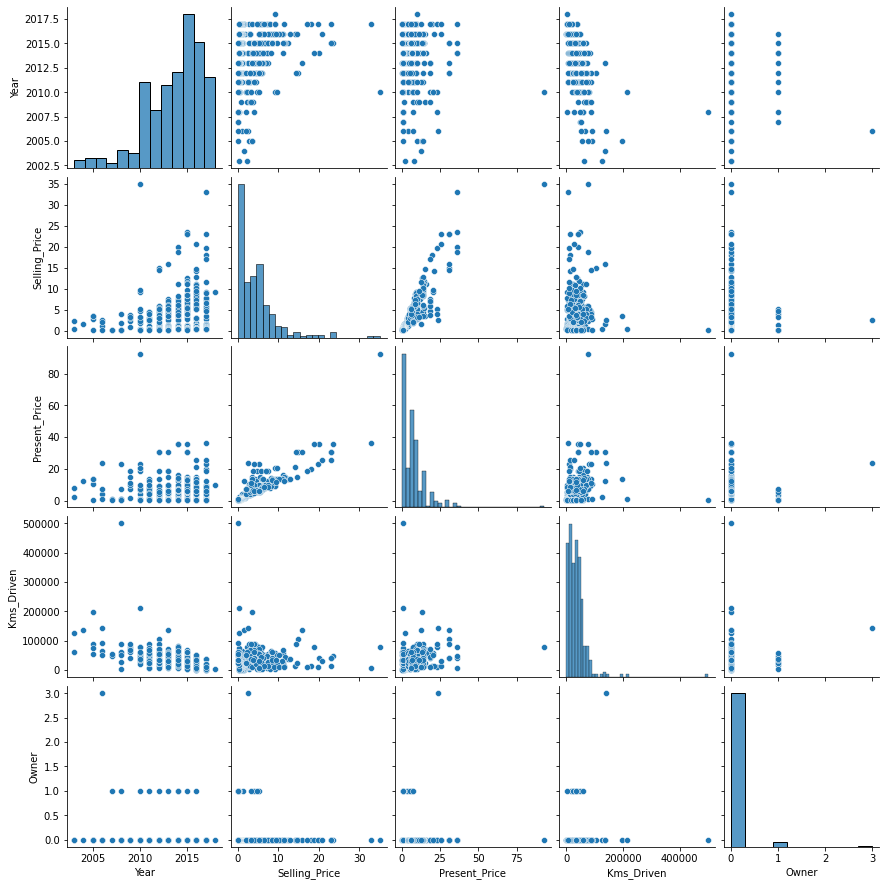

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(car_df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


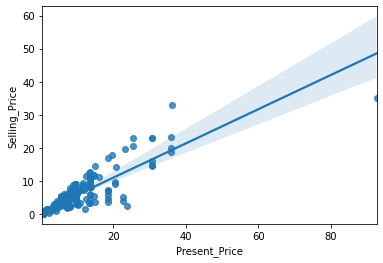

In [8]:
sns.regplot('Present_Price','Selling_Price',data=car_df) #Selling price increases as present price increases

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


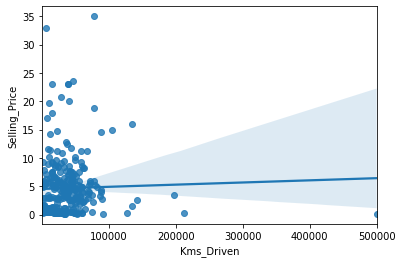

In [9]:
sns.regplot('Kms_Driven','Selling_Price',data=car_df) #Lesser Kms_Driven higher selling price

In [10]:
#Adding new variable Age to know how old the car is
car_df['car_age']=2020 - car_df['Year']

In [11]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


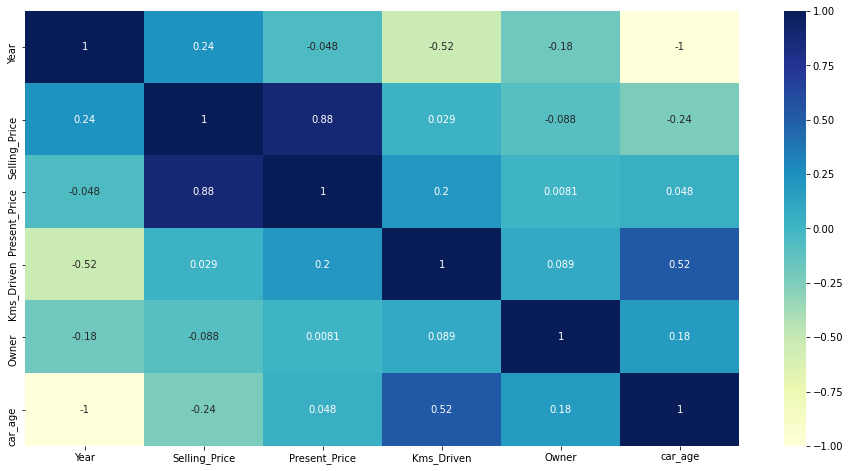

In [12]:
cor=car_df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

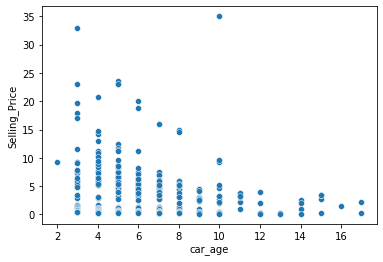

In [13]:
sns.scatterplot(x = 'car_age', y = 'Selling_Price', data = car_df) #Recent cars have higher selling price

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


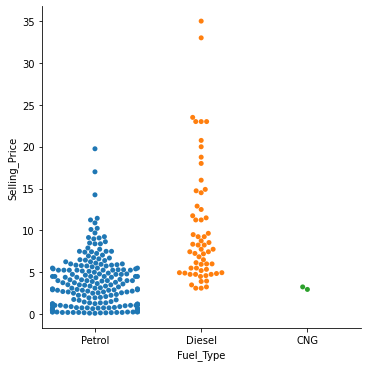

In [14]:
#Visualizing with categorical data
sns.catplot(x = 'Fuel_Type', y = 'Selling_Price', data = car_df, kind = 'swarm') #Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG.

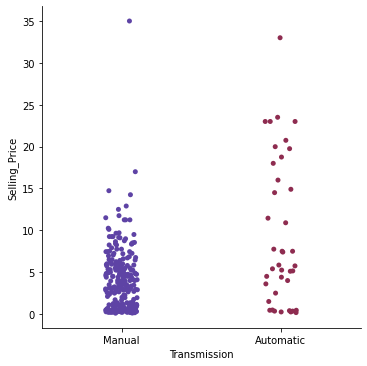

In [15]:
sns.catplot(x = 'Transmission', y = 'Selling_Price', data = car_df, palette = 'twilight') #Car of Manual type is of less priced whereas of Automatic type is high

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


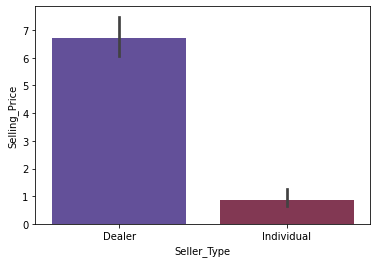

In [16]:
sns.barplot('Seller_Type','Selling_Price',data=car_df,palette='twilight') #Cars sold by Individual tend to get less Selling Price when sold by Dealers

In [46]:
#Multivariable Linear regression
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(car_df[['car_age','Present_Price','Kms_Driven',]],car_df.Selling_Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
reg.coef_

array([-4.81304272e-01,  5.25621901e-01, -1.21350189e-06])

In [48]:
reg.intercept_

3.7633549466503244

In [49]:
x=car_df[['car_age','Present_Price','Kms_Driven']].values
y=car_df['Selling_Price'].values

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.1)
x_train

array([[4.00000e+00, 5.40000e-01, 5.00000e+02],
       [4.00000e+00, 5.90000e+00, 5.46400e+03],
       [8.00000e+00, 3.06100e+01, 1.04707e+05],
       [8.00000e+00, 8.10000e-01, 1.90000e+04],
       [6.00000e+00, 6.95000e+00, 4.50000e+04],
       [7.00000e+00, 1.86100e+01, 5.60010e+04],
       [6.00000e+00, 7.00000e+00, 3.50000e+04],
       [5.00000e+00, 9.40000e+00, 6.13810e+04],
       [3.00000e+00, 9.85000e+00, 6.90000e+03],
       [8.00000e+00, 2.69000e+00, 5.00000e+04],
       [4.00000e+00, 1.78000e+00, 6.00000e+03],
       [3.00000e+00, 8.70000e-01, 1.10000e+04],
       [3.00000e+00, 9.50000e-01, 3.50000e+03],
       [1.40000e+01, 2.37300e+01, 1.42000e+05],
       [9.00000e+00, 1.05000e+00, 3.00000e+04],
       [1.10000e+01, 7.21000e+00, 7.74270e+04],
       [3.00000e+00, 5.40000e-01, 8.60000e+03],
       [6.00000e+00, 6.40000e-01, 1.37000e+04],
       [7.00000e+00, 7.87000e-01, 1.60000e+04],
       [3.00000e+00, 1.82000e+00, 1.40000e+03],
       [7.00000e+00, 1.86100e+01, 4.5000

In [51]:
reg.fit(x_train,y_train)
reg.predict(x_test)

array([ 6.12346277,  5.99973358, -0.14819493,  2.78225383,  5.39237194,
        1.41517357,  7.22707303,  0.94665724,  1.67639829,  3.53469793,
        4.79644737,  8.40345582,  5.35805746,  8.48013873,  7.00793786,
        4.04167593,  5.53312952,  3.55695182,  2.93780736,  3.17372482,
        5.29040443,  4.53857324,  2.90684169,  5.87889905,  4.4370919 ,
        5.08228693,  2.61664395,  8.48843553,  2.12313162,  2.68445529,
        2.68212676])

In [52]:
reg.score(x_test,y_test)

0.825617153983984

In [53]:
reg.predict([[3,10.5,7000]])

array([7.88561821])